# import the neccessary module and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from datetime import date
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

data=pd.read_excel('Data.xlsx')

# data['Tiket Status '].value_counts()


In [2]:
data

,title,gender,Nationality,dateOfBirth,Age,miles,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Date_of_Cancelation,Tiketed_Date,Tiket Status,Ticket First time Use,Rescheduled_Date,Refund Status
0,Mr.,M,Ethiopia,1985-08-27,1863-03-02,NaN,ET268,Economy Class,Tiketed,3/2/2018,NaN,4/3/2018,Canceled,No,NaN,No
1,Miss.,F,Liberia,1996-12-16,NaT,NaN,ET268,Economy Class,Tiketed,9/2/2018,NaN,4/3/2018,Canceled,No,NaN,No
2,Mr.,M,Ethiopia,1985-08-27,NaT,NaN,ET266,Economy Class,Tiketed,5/2/2018,NaN,3/3/2018,Canceled,No,NaN,No
3,Mr.,M,France,1994-01-19,NaT,NaN,ET114,Economy Class,Tiketed,1/2/2018,NaN,2/3/2018,Canceled,No,NaN,No
4,Mr.,M,Ethiopia,1998-08-24,NaT,NaN,ET114,Economy Class,Tiketed,6/2/2018,NaN,2/3/2018,Canceled,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Mrs.,F,US,1978-05-23,NaT,NaN,ET114,Economy Class,Tiketed,22/11/2017,NaN,27/12/2017,Tiketed Not Used,No,NaN,No
1364,Mr.,M,Ethiopia,1995-12-02,NaT,75200.0,ET124,Economy Class,Tiketed,23/11/2017,NaN,21/12/2017,Tiketed Not Used,No,NaN,No
1365,Mrs.,F,Ethiopia,1986-07-06,NaT,NaN,ET266,Economy Class,Tiketed,14/11/2017,NaN,13/12/2017,Tiketed Not Used,No,NaN,No
1366,Mr.,M,Ethiopia,1977-09-03,NaT,NaN,ET266,Economy Class,Tiketed,6/11/2017,NaN,8/12/2017,Tiketed Not Used,No,NaN,No


# Generate Age

In [3]:
def calculateAge(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

for index, row in data.iterrows():
    age=calculateAge(row['dateOfBirth'])
    if(age<14):
        data.iloc[index,4]="Children"
    elif(age<25):
        data.iloc[index,4]="Youth"
    elif(age<65):
        data.iloc[index,4]="Adult"
    else:
        data.iloc[index,4]="Senior"

In [4]:
data

,title,gender,Nationality,dateOfBirth,Age,miles,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Date_of_Cancelation,Tiketed_Date,Tiket Status,Ticket First time Use,Rescheduled_Date,Refund Status
0,Mr.,M,Ethiopia,1985-08-27,Adult,NaN,ET268,Economy Class,Tiketed,3/2/2018,NaN,4/3/2018,Canceled,No,NaN,No
1,Miss.,F,Liberia,1996-12-16,Adult,NaN,ET268,Economy Class,Tiketed,9/2/2018,NaN,4/3/2018,Canceled,No,NaN,No
2,Mr.,M,Ethiopia,1985-08-27,Adult,NaN,ET266,Economy Class,Tiketed,5/2/2018,NaN,3/3/2018,Canceled,No,NaN,No
3,Mr.,M,France,1994-01-19,Adult,NaN,ET114,Economy Class,Tiketed,1/2/2018,NaN,2/3/2018,Canceled,No,NaN,No
4,Mr.,M,Ethiopia,1998-08-24,Youth,NaN,ET114,Economy Class,Tiketed,6/2/2018,NaN,2/3/2018,Canceled,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Mrs.,F,US,1978-05-23,Adult,NaN,ET114,Economy Class,Tiketed,22/11/2017,NaN,27/12/2017,Tiketed Not Used,No,NaN,No
1364,Mr.,M,Ethiopia,1995-12-02,Adult,75200.0,ET124,Economy Class,Tiketed,23/11/2017,NaN,21/12/2017,Tiketed Not Used,No,NaN,No
1365,Mrs.,F,Ethiopia,1986-07-06,Adult,NaN,ET266,Economy Class,Tiketed,14/11/2017,NaN,13/12/2017,Tiketed Not Used,No,NaN,No
1366,Mr.,M,Ethiopia,1977-09-03,Adult,NaN,ET266,Economy Class,Tiketed,6/11/2017,NaN,8/12/2017,Tiketed Not Used,No,NaN,No


# Drop irrelevant column and clean data 

In [5]:
cols_to_drop=['miles','Rescheduled_Date','Date_of_Cancelation','title','Ticket First time Use','Rescheduled_Date','Refund Status','dateOfBirth']
df=data.drop(cols_to_drop,axis=1)

In [6]:
df

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date,Tiket Status
0,M,Ethiopia,Adult,ET268,Economy Class,Tiketed,3/2/2018,4/3/2018,Canceled
1,F,Liberia,Adult,ET268,Economy Class,Tiketed,9/2/2018,4/3/2018,Canceled
2,M,Ethiopia,Adult,ET266,Economy Class,Tiketed,5/2/2018,3/3/2018,Canceled
3,M,France,Adult,ET114,Economy Class,Tiketed,1/2/2018,2/3/2018,Canceled
4,M,Ethiopia,Youth,ET114,Economy Class,Tiketed,6/2/2018,2/3/2018,Canceled
...,...,...,...,...,...,...,...,...,...
1363,F,US,Adult,ET114,Economy Class,Tiketed,22/11/2017,27/12/2017,Tiketed Not Used
1364,M,Ethiopia,Adult,ET124,Economy Class,Tiketed,23/11/2017,21/12/2017,Tiketed Not Used
1365,F,Ethiopia,Adult,ET266,Economy Class,Tiketed,14/11/2017,13/12/2017,Tiketed Not Used
1366,M,Ethiopia,Adult,ET266,Economy Class,Tiketed,6/11/2017,8/12/2017,Tiketed Not Used


# Modify Class of service

In [7]:
df.loc[df['cabin_class of service'] == 'Economy Class','cabin_class of service']='Economy'
df.loc[df['cabin_class of service'] == 'Business Class','cabin_class of service']='Business'
df.loc[df['Nationality'] == 'Ethiopia','Nationality']='Local'
df.loc[df['Nationality'] != 'Local','Nationality']='Foreign'

In [8]:
df

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date,Tiket Status
0,M,Local,Adult,ET268,Economy,Tiketed,3/2/2018,4/3/2018,Canceled
1,F,Foreign,Adult,ET268,Economy,Tiketed,9/2/2018,4/3/2018,Canceled
2,M,Local,Adult,ET266,Economy,Tiketed,5/2/2018,3/3/2018,Canceled
3,M,Foreign,Adult,ET114,Economy,Tiketed,1/2/2018,2/3/2018,Canceled
4,M,Local,Youth,ET114,Economy,Tiketed,6/2/2018,2/3/2018,Canceled
...,...,...,...,...,...,...,...,...,...
1363,F,Foreign,Adult,ET114,Economy,Tiketed,22/11/2017,27/12/2017,Tiketed Not Used
1364,M,Local,Adult,ET124,Economy,Tiketed,23/11/2017,21/12/2017,Tiketed Not Used
1365,F,Local,Adult,ET266,Economy,Tiketed,14/11/2017,13/12/2017,Tiketed Not Used
1366,M,Local,Adult,ET266,Economy,Tiketed,6/11/2017,8/12/2017,Tiketed Not Used


# Check for null value

<AxesSubplot:>

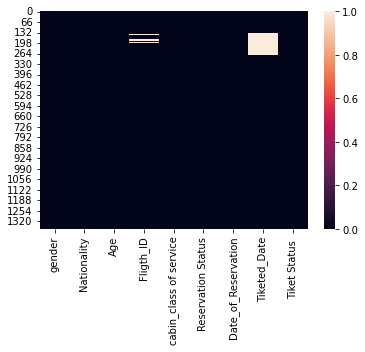

In [9]:
sb.heatmap(df.isnull())

# Filling Missing value

In [10]:
df["gender"].fillna(df['gender'].mode()[0], inplace = True)
df["Nationality"].fillna(df['Nationality'].mode()[0], inplace = True)
df["Age"].fillna(df['Age'].mode()[0], inplace = True)
df["Fligth_ID"].fillna(df['Fligth_ID'].mode()[0], inplace = True)
df["cabin_class of service"].fillna(df['cabin_class of service'].mode()[0], inplace = True)
df["Reservation Status"].fillna(df['Reservation Status'].mode()[0], inplace = True)
df["Date_of_Reservation"].fillna(df['Date_of_Reservation'].mode()[0], inplace = True)
df["Tiketed_Date"].fillna(df['Tiketed_Date'].mode()[0], inplace = True)

In [11]:
df['Fligth_ID'].mode()[0]

'ET114'

<AxesSubplot:>

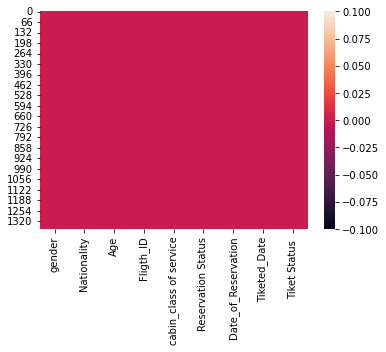

In [12]:
sb.heatmap(df.isnull())

# Convert Categorical value to number value

In [13]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical value to number 
le_Age=LabelEncoder()
le_gender=LabelEncoder()
le_nationality=LabelEncoder()
le_flightID=LabelEncoder()
le_cabinClass=LabelEncoder()
le_reservationStatus=LabelEncoder()
le_ticket_status=LabelEncoder()

df['N_Age']=le_Age.fit_transform(df['Age'])
df['N_Gender']=le_nationality.fit_transform(df['gender'])
df['N_Nationality']=le_nationality.fit_transform(df['Nationality'])
df['N_FlightID']=le_nationality.fit_transform(df['Fligth_ID'])
df['N_CabinClass']=le_nationality.fit_transform(df['cabin_class of service'])
df['N_ReservationStatus']=le_nationality.fit_transform(df['Reservation Status'])
df['N_TicketStatus']=le_nationality.fit_transform(df['Tiket Status '])

# convert date or timestamp to number 

le_TiketedDate=LabelEncoder()
le_ReservationDate=LabelEncoder()

df['N_TicketedDate']=le_nationality.fit_transform(df['Tiketed_Date'])
df['N_ReservationDate']=le_nationality.fit_transform(df['Date_of_Reservation'])

before_drop=df;


# Categorize Date

In [14]:
for index, row in df.iterrows():
    tDate=row['N_TicketedDate']
    RDate=row['N_ReservationDate']
    if(tDate<30):
        df.iloc[index,16]=0
    elif(tDate<60):
        df.iloc[index,16]=1
    elif(tDate<90):
        df.iloc[index,16]=2
    elif(tDate>90):
        df.iloc[index,16]=3
    
    if(RDate<30):
        df.iloc[index,17]=0
    elif(RDate<60):
        df.iloc[index,17]=1
    elif(RDate<90):
        df.iloc[index,17]=2
    elif(RDate>90):
        df.iloc[index,17]=3


In [15]:
df

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date,Tiket Status,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationStatus,N_TicketStatus,N_TicketedDate,N_ReservationDate
0,M,Local,Adult,ET268,Economy,Tiketed,3/2/2018,4/3/2018,Canceled,0,1,1,4,1,1,0,2,2
1,F,Foreign,Adult,ET268,Economy,Tiketed,9/2/2018,4/3/2018,Canceled,0,0,0,4,1,1,0,2,3
2,M,Local,Adult,ET266,Economy,Tiketed,5/2/2018,3/3/2018,Canceled,0,1,1,3,1,1,0,2,2
3,M,Foreign,Adult,ET114,Economy,Tiketed,1/2/2018,2/3/2018,Canceled,0,1,0,0,1,1,0,1,0
4,M,Local,Youth,ET114,Economy,Tiketed,6/2/2018,2/3/2018,Canceled,2,1,1,0,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,F,Foreign,Adult,ET114,Economy,Tiketed,22/11/2017,27/12/2017,Tiketed Not Used,0,0,0,0,1,1,5,2,1
1364,M,Local,Adult,ET124,Economy,Tiketed,23/11/2017,21/12/2017,Tiketed Not Used,0,1,1,1,1,1,5,1,1
1365,F,Local,Adult,ET266,Economy,Tiketed,14/11/2017,13/12/2017,Tiketed Not Used,0,0,1,3,1,1,5,0,0
1366,M,Local,Adult,ET266,Economy,Tiketed,6/11/2017,8/12/2017,Tiketed Not Used,0,1,1,3,1,1,5,2,2


# Drop categorical value

In [43]:
cols_to_drop=['Age','gender','Nationality','Fligth_ID','cabin_class of service','Reservation Status','Tiket Status ','Tiketed_Date','Date_of_Reservation']
new_df=df.drop(cols_to_drop,axis=1)


In [44]:
new_df

,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationStatus,N_TicketStatus,N_TicketedDate,N_ReservationDate
0,0,1,1,4,1,1,0,2,2
1,0,0,0,4,1,1,0,2,3
2,0,1,1,3,1,1,0,2,2
3,0,1,0,0,1,1,0,1,0
4,2,1,1,0,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...
1363,0,0,0,0,1,1,5,2,1
1364,0,1,1,1,1,1,5,1,1
1365,0,0,1,3,1,1,5,0,0
1366,0,1,1,3,1,1,5,2,2


# Split the Dataset in to training and test data set

In [18]:
from sklearn.model_selection import train_test_split

input_x=new_df[['N_Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_ReservationStatus','N_ReservationDate']]
target_y=new_df['N_TicketStatus']

x_train,x_test,y_train,y_test=train_test_split(input_x,target_y,test_size=0.3,random_state=0)


In [19]:
x_test

,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationStatus,N_ReservationDate
1039,0,1,1,3,1,1,2
1084,0,0,0,4,1,1,2
597,0,0,0,3,1,1,1
31,0,1,1,0,0,1,2
142,0,1,1,2,1,0,2
...,...,...,...,...,...,...,...
271,0,0,0,2,1,0,2
1262,0,1,1,3,0,1,0
1277,0,1,1,1,0,1,1
1038,0,1,1,4,1,1,2


In [20]:
x_train

,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationStatus,N_ReservationDate
592,2,0,0,4,1,1,2
1011,2,1,0,1,1,1,2
1244,0,1,1,4,1,1,0
1030,0,0,1,2,1,1,2
16,0,0,1,0,1,1,90
...,...,...,...,...,...,...,...
763,0,0,1,2,1,1,1
835,0,0,1,3,1,1,0
1216,0,0,1,3,1,1,1
559,0,1,0,3,1,1,2


# Build Decission Tree Classifier model 

In [21]:
from sklearn import tree

# Build
model=tree.DecisionTreeClassifier() 




# Train Data 

In [22]:
testY=model.fit(input_x,target_y)
actual=model.score(x_train,y_train)
actual

0.8714733542319749

# Test Data

In [23]:
predict=model.predict(x_test)
model.score(x_test,y_test)


0.8905109489051095

# Accuracy Test

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.8905109489051095

In [25]:
y_test

1039    4
1084    4
597     4
31      0
142     2
       ..
271     2
1262    4
1277    4
1038    4
122     1
Name: N_TicketStatus, Length: 411, dtype: int32

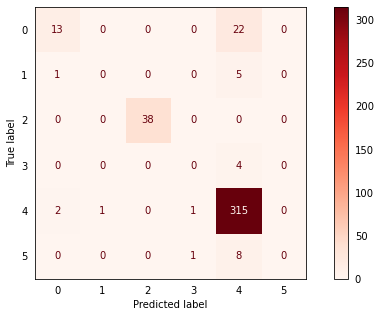

In [26]:
from sklearn.metrics import confusion_matrix

matrix=plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Reds)
# matrix.ax_.set_title('Confusion Matrix',color='white')
# plt.xlabel('True Label',color='white')
# plt.ylabel('True Label',color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,5)
plt.show()
# confusion_matrix(y_test, predict)
# confusionchart(confusion_matrix(y_true, y_pred))
# correct=27+2+27+207+6
# incorrect=2+1
# total=274 #the total is y_test length
# accuray=correct/total


In [27]:
# from sklearn.metrics import precision_score
# precision_score(y_test, predict)
# new_df

# Random prediction for test

In [28]:
# print(model.predict([[36,1,11,4,1,1,78,66]]))
# print(model.predict([[44,0,43,0,1,1,60,41]]))

In [29]:
# new_df

In [30]:
df['N_TicketStatus'].value_counts()


4    1047
2     136
0      99
1      37
3      25
5      24
Name: N_TicketStatus, dtype: int64

In [31]:
before_drop['Tiket Status '].value_counts()

Ticketed Used        1047
Not Ticketed          136
Canceled               99
Exchanged              37
Refunded               25
Tiketed  Not Used      24
Name: Tiket Status , dtype: int64

In [32]:
before_drop

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date,Tiket Status,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationStatus,N_TicketStatus,N_TicketedDate,N_ReservationDate
0,M,Local,Adult,ET268,Economy,Tiketed,3/2/2018,4/3/2018,Canceled,0,1,1,4,1,1,0,2,2
1,F,Foreign,Adult,ET268,Economy,Tiketed,9/2/2018,4/3/2018,Canceled,0,0,0,4,1,1,0,2,3
2,M,Local,Adult,ET266,Economy,Tiketed,5/2/2018,3/3/2018,Canceled,0,1,1,3,1,1,0,2,2
3,M,Foreign,Adult,ET114,Economy,Tiketed,1/2/2018,2/3/2018,Canceled,0,1,0,0,1,1,0,1,0
4,M,Local,Youth,ET114,Economy,Tiketed,6/2/2018,2/3/2018,Canceled,2,1,1,0,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,F,Foreign,Adult,ET114,Economy,Tiketed,22/11/2017,27/12/2017,Tiketed Not Used,0,0,0,0,1,1,5,2,1
1364,M,Local,Adult,ET124,Economy,Tiketed,23/11/2017,21/12/2017,Tiketed Not Used,0,1,1,1,1,1,5,1,1
1365,F,Local,Adult,ET266,Economy,Tiketed,14/11/2017,13/12/2017,Tiketed Not Used,0,0,1,3,1,1,5,0,0
1366,M,Local,Adult,ET266,Economy,Tiketed,6/11/2017,8/12/2017,Tiketed Not Used,0,1,1,3,1,1,5,2,2


In [33]:
before_drop.loc[before_drop['Nationality'] == 'Ethiopia','Nationality']='Local'
before_drop.loc[before_drop['Nationality'] != 'Local','Nationality']='Foreign'

In [34]:
before_drop

,gender,Nationality,Age,Fligth_ID,cabin_class of service,Reservation Status,Date_of_Reservation,Tiketed_Date,Tiket Status,N_Age,N_Gender,N_Nationality,N_FlightID,N_CabinClass,N_ReservationStatus,N_TicketStatus,N_TicketedDate,N_ReservationDate
0,M,Local,Adult,ET268,Economy,Tiketed,3/2/2018,4/3/2018,Canceled,0,1,1,4,1,1,0,2,2
1,F,Foreign,Adult,ET268,Economy,Tiketed,9/2/2018,4/3/2018,Canceled,0,0,0,4,1,1,0,2,3
2,M,Local,Adult,ET266,Economy,Tiketed,5/2/2018,3/3/2018,Canceled,0,1,1,3,1,1,0,2,2
3,M,Foreign,Adult,ET114,Economy,Tiketed,1/2/2018,2/3/2018,Canceled,0,1,0,0,1,1,0,1,0
4,M,Local,Youth,ET114,Economy,Tiketed,6/2/2018,2/3/2018,Canceled,2,1,1,0,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,F,Foreign,Adult,ET114,Economy,Tiketed,22/11/2017,27/12/2017,Tiketed Not Used,0,0,0,0,1,1,5,2,1
1364,M,Local,Adult,ET124,Economy,Tiketed,23/11/2017,21/12/2017,Tiketed Not Used,0,1,1,1,1,1,5,1,1
1365,F,Local,Adult,ET266,Economy,Tiketed,14/11/2017,13/12/2017,Tiketed Not Used,0,0,1,3,1,1,5,0,0
1366,M,Local,Adult,ET266,Economy,Tiketed,6/11/2017,8/12/2017,Tiketed Not Used,0,1,1,3,1,1,5,2,2


# Gender with Ticket Status Aggregation

In [35]:
genderTicketAggregated= before_drop.groupby(['Tiket Status ','gender'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_TicketedDate','N_ReservationStatus','N_ReservationDate','Nationality','Fligth_ID','cabin_class of service','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=genderTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
genderDf = pd.DataFrame(columns=["Index","Gender","Canceled", "Exchanged","Not Ticketed","Refunded","Ticketed Used","Tiketed Not Used	"]).set_index('Index')
genderDf[genderDf.columns[0]] = ["Male", "Female"]
test=[]
for index, row in result.iterrows():
    test.append(row[0])
j=0;
for i in range(len(test)):
    this_column = genderDf.columns[i+1]
    genderDf[this_column] = [test[j], test[j+1]]
    j=j+2
    if(i==5):
        break
genderDf.to_excel("GenderTicketStatusAggregationResult.xlsx",index=False)
genderTicket=pd.read_excel('GenderTicketStatusAggregationResult.xlsx')
genderTicket


,Gender,Canceled,Exchanged,Not Ticketed,Refunded,Ticketed Used,Tiketed Not Used\t
0,Male,44,29,59,11,465,12
1,Female,55,8,77,14,582,12


In [36]:
genderTicketAggregated

Nationality  Age  Fligth_ID  cabin_class of service  \
Tiket Status      gender                                                        
Canceled          F                44   44         44                      44   
                  M                55   55         55                      55   
Exchanged         F                29   29         29                      29   
                  M                 8    8          8                       8   
Not Ticketed      F                59   59         59                      59   
                  M                77   77         77                      77   
Refunded          F                11   11         11                      11   
                  M                14   14         14                      14   
Ticketed Used     F               465  465        465                     465   
                  M               582  582        582                     582   
Tiketed  Not Used F                12   12         12                      12   
                  M                12   12         12                      12   

                          Reservation Status  Date_of_Reservation  \
Tiket Status      gender                                            
Canceled          F                       44                   44   
                  M                       55                   55   
Exchanged         F                       29                   29   
                  M                        8                    8   
Not Ticketed      F                       59                   59   
                  M                       77                   77   
Refunded          F                       11                   11   
                  M                       14                   14   
Ticketed Used     F                      465                  465   
                  M                      582                  582   
Tiketed  Not Used F                       12                   12   
                  M                       12                   12   

                          Tiketed_Date  N_Age  N_Gender  N_Nationality  \
Tiket Status      gender                                                 
Canceled          F                 44     44        44             44   
                  M                 55     55        55             55   
Exchanged         F                 29     29        29             29   
                  M                  8      8         8              8   
Not Ticketed      F                 59     59        59             59   
                  M                 77     77        77             77   
Refunded          F                 11     11        11             11   
                  M                 14     14        14             14   
Ticketed Used     F                465    465       465            465   
                  M                582    582       582            582   
Tiketed  Not Used F                 12     12        12             12   
                  M                 12     12        12             12   

                          N_FlightID  N_CabinClass  N_ReservationStatus  \
Tiket Status      gender                                                  
Canceled          F               44            44                   44   
                  M               55            55                   55   
Exchanged         F               29            29                   29   
                  M                8             8                    8   
Not Ticketed      F               59            59                   59   
                  M               77            77                   77   
Refunded          F               11            11                   11   
                  M               14            14                   14   
Ticketed Used     F              465           465                  465   
                  M              582           582            

In [37]:
# before_drop

# Class of Service with Ticket Status Aggregation

In [38]:
classOfServiceTicketAggregated= before_drop.groupby(['Tiket Status ','cabin_class of service'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_TicketedDate','N_ReservationStatus','N_ReservationDate','Nationality','Fligth_ID','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=classOfServiceTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
classDf = pd.DataFrame(columns=["Index","Class","Canceled", "Exchanged","Not Ticketed","Refunded","Ticketed Used","Tiketed Not Used	"]).set_index('Index')
classDf[classDf.columns[0]] = ["Business", "Economic"]
test=[]
for index, row in result.iterrows():
    test.append(row[0])
j=0;
for i in range(len(test)):
    this_column = classDf.columns[i+1]
    classDf[this_column] = [test[j], test[j+1]]
    j=j+2
    if(i==5):
        break
classDf.to_excel("ClassOfServiceTicketStatusAggregationResult.xlsx",index=False)
classTicket=pd.read_excel('ClassOfServiceTicketStatusAggregationResult.xlsx')
classTicket

,Class,Canceled,Exchanged,Not Ticketed,Refunded,Ticketed Used,Tiketed Not Used\t
0,Business,5,2,1,2,58,1
1,Economic,94,35,135,23,989,23


# Flight Number with Ticket Status Aggregation

In [39]:
FlightNumberTicketAggregated= before_drop.groupby(['Tiket Status ','Fligth_ID'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_TicketedDate','N_ReservationStatus','N_ReservationDate','Nationality','cabin_class of service','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=FlightNumberTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
flightDf = pd.DataFrame(columns=["Index","Flight Number","Canceled", "Exchanged","Not Ticketed","Refunded","Ticketed Used","Tiketed Not Used	"]).set_index('Index')
flightDf[flightDf.columns[0]] = ["ET114", "ET124","ET168", "ET266","ET268"]
test=[]
for index, row in result.iterrows():
    test.append(row[0])   
j=0;
for i in range(len(test)):
    this_column = flightDf.columns[i+1]
    flightDf[this_column] = [test[j], test[j+1],test[j+2], test[j+3],test[j+4]]
    j=j+5
    if(i==5):
        break
flightDf.to_excel("FlightNumberTicketStatusAggregationResult.xlsx",index=False)
flightNumberTicket=pd.read_excel('FlightNumberTicketStatusAggregationResult.xlsx')
flightNumberTicket

,Flight Number,Canceled,Exchanged,Not Ticketed,Refunded,Ticketed Used,Tiketed Not Used\t
0,ET114,28,13,50,7,193,5
1,ET124,26,9,24,4,201,7
2,ET168,16,8,24,6,212,2
3,ET266,12,2,17,3,227,4
4,ET268,17,5,21,5,214,6


# Nationality with Ticket Status Aggregation

In [40]:
NationalityTicketAggregated= before_drop.groupby(['Tiket Status ','Nationality'],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_TicketedDate','N_ReservationStatus','N_ReservationDate','cabin_class of service','Fligth_ID','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=NationalityTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
nationalityDf = pd.DataFrame(columns=["Index","Nationality","Canceled", "Exchanged","Not Ticketed","Refunded","Ticketed Used","Tiketed Not Used	"]).set_index('Index')
nationalityDf[nationalityDf.columns[0]] = ["Foreign", "Local"]
test=[]
for index, row in result.iterrows():
    test.append(row[0])
j=0;
for i in range(len(test)):
    this_column = nationalityDf.columns[i+1]
    nationalityDf[this_column] = [test[j], test[j+1]]
    j=j+2
    if(i==5):
        break
nationalityDf.to_excel("NationalityTicketStatusAggregationResult.xlsx",index=False)
nationalityTicket=pd.read_excel('NationalityTicketStatusAggregationResult.xlsx')
nationalityTicket

,Nationality,Canceled,Exchanged,Not Ticketed,Refunded,Ticketed Used,Tiketed Not Used\t
0,Foreign,21,8,49,6,261,4
1,Local,78,29,87,19,786,20


# Age Status with Ticket Status Aggregation

In [41]:
AgeTicketAggregated= before_drop.groupby(['Tiket Status ','Age'],as_index=True).count()
tobedrop=['Fligth_ID','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_TicketedDate','N_ReservationStatus','N_ReservationDate','Nationality','cabin_class of service','gender','Reservation Status','Tiketed_Date','Date_of_Reservation']
result=AgeTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
ageDf = pd.DataFrame(columns=["Index","Age","Canceled", "Exchanged","Not Ticketed","Refunded","Ticketed Used","Tiketed Not Used	"]).set_index('Index')
ageDf[ageDf.columns[0]] = ["Adult", "Youth","Senior"]
test=[]
for index, row in result.iterrows():
    test.append(row[0])   
j=0;
for i in range(len(test)):
    this_column = ageDf.columns[i+1]
    ageDf[this_column] = [test[j], test[j+1],test[j+2]]
    j=j+3
    if(i==5):
        break
ageDf.to_excel("AgeTicketStatusAggregationResult.xlsx",index=False)
AgeTicket=pd.read_excel('AgeTicketStatusAggregationResult.xlsx')
AgeTicket

,Age,Canceled,Exchanged,Not Ticketed,Refunded,Ticketed Used,Tiketed Not Used\t
0,Adult,76,35,102,19,844,19
1,Youth,10,1,13,1,72,2
2,Senior,13,1,21,5,131,3


# Reservation Status with Ticket Status Aggregation

In [42]:
reservationTicketAggregated= before_drop.groupby(['Reservation Status','Tiket Status '],as_index=True).count()
tobedrop=['Age','N_Gender','N_Nationality','N_FlightID','N_CabinClass','N_TicketStatus','N_TicketedDate','N_ReservationStatus','N_ReservationDate','cabin_class of service','Fligth_ID','gender','Nationality','Tiketed_Date','Date_of_Reservation']
result=reservationTicketAggregated.drop(tobedrop,axis=1)
result
# Assign row as column headers
result
statusDf = pd.DataFrame(columns=["Index","Status","Not Ticketed", "Exchanged","Canceled","Refunded","Ticketed Used","Tiketed Not Used	"]).set_index('Index')
statusDf[statusDf.columns[0]] = ["Canceled", "Tiketed"]

test=[]
for index, row in result.iterrows():
    test.append(row[0])
j=0;
for i in range(len(test)):
    this_column = statusDf.columns[i+1]
    statusDf[this_column] = [0, test[j]]
    j=j+1
    if(i==5):
        break
statusDf[statusDf.columns[1]] = [test[0], 0]
statusDf.to_excel("ReservationTicketStatusAggregationResult.xlsx",index=False)
reservatonTicket=pd.read_excel('ReservationTicketStatusAggregationResult.xlsx')
reservatonTicket

,Status,Not Ticketed,Exchanged,Canceled,Refunded,Ticketed Used,Tiketed Not Used\t
0,Canceled,136,0,0,0,0,0
1,Tiketed,0,99,37,25,1047,24
